In [72]:
%pip install pandas
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import pandas as pd
import numpy as np
listings = pd.read_csv(r'D:\Courses\Data Analyst BIT School\Python\Data\Airbnb+Data\Airbnb Data\Listings.csv', low_memory=False, encoding="ISO-8859-1")
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [75]:
##Cast any date columns as a datetime format
listings.info()
listings['host_since'] = pd.to_datetime(listings['host_since'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [76]:
##Filter the data down to rows where the city is Paris, 
# and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
paris_listings=(listings.query('city == "Paris"').loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']])
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [77]:
#QA the Paris listings data: check for missing values, and calculate the minimum, maximum, 
# and average for each numeric field
paris_listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [78]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [79]:
#Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood').agg({'price': 'mean'}).sort_values(by='price', ascending=True)
paris_listings_neighbourhood.head()


,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [80]:
#Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodates’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
paris_listings_accomodations = paris_listings.query('neighbourhood == @paris_listings_neighbourhood.index[-1]').groupby('accommodates').agg({'price': 'mean'}).sort_values(by='price', ascending=True)
paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [81]:
#Parameters
neigh=paris_listings_neighbourhood.index[-1]
sort_asc=True
top_n=10
#Main analysis
paris_listings_accomodations=(
    paris_listings.query('neighbourhood==@neigh')
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values(by='price',ascending=sort_asc)
    .head(top_n)
)
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [82]:
#Create a function named analyze_price_by_neighbourhood that takes in a DataFrame, a neighbourhood name,
# a boolean for ascending order, and an integer for the number of top results to return.
def analyze_price_by_accomodation(df, niehborhood, ascending=True, top_n=5):
    return (
        df.query('neighbourhood==@niehborhood')
        .groupby('accommodates')
        .agg({'price': 'mean'})
        .sort_values(by='price', ascending=ascending)
        .head(top_n)
    )
#Call the function
analyze_price_by_accomodation(paris_listings, neigh, sort_asc, top_n)

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [83]:
#Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts
paris_listings_over_time=(
    paris_listings.groupby(paris_listings['host_since'].dt.year)
    .agg({'price': 'mean', 'host_since': 'count'})
    .rename(columns={'host_since': 'new_hosts'})
    .reset_index()
    .sort_values(by='host_since', ascending=True)
)
paris_listings_over_time.head()

,host_since,price,new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as mpla


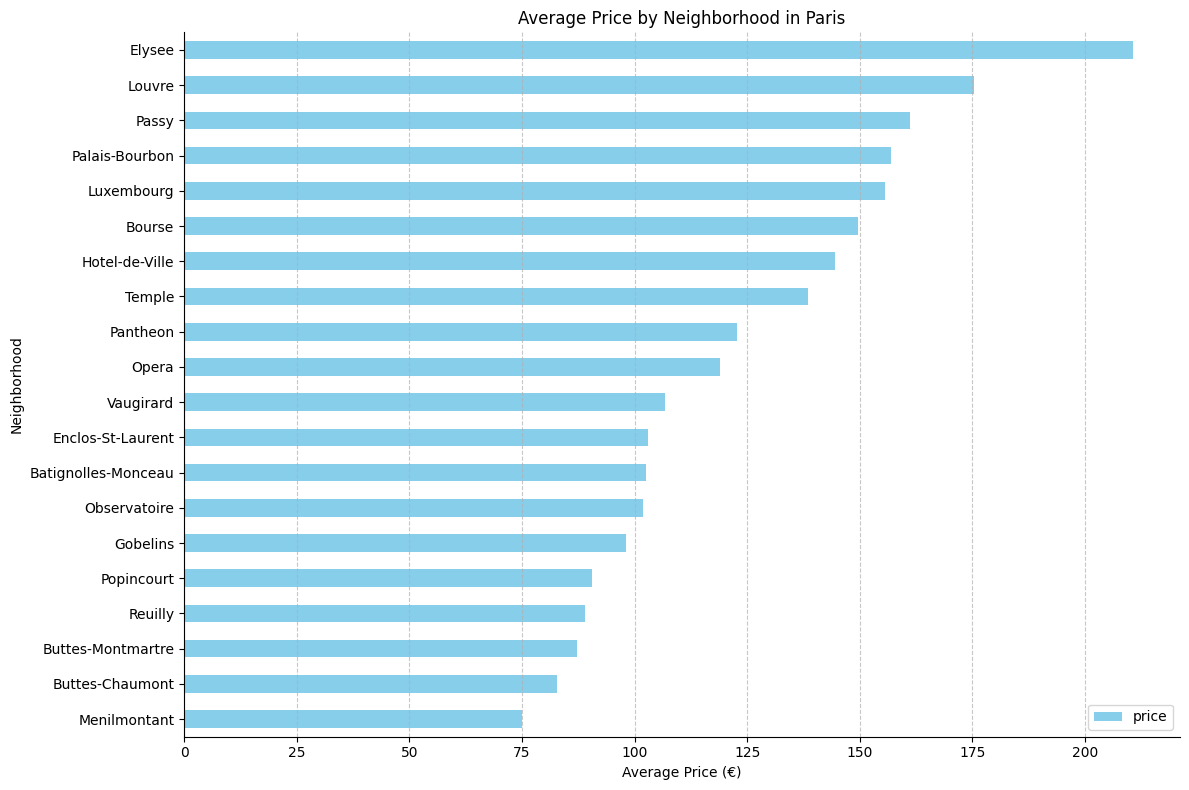

In [85]:
#Create a horizontal bar chart of the average price by neighborhood in Paris, 
# and make sure to add a title and change axis labels as needed
paris_listings_neighbourhood.plot(kind='barh', figsize=(12, 8), color='skyblue')
plt.title('Average Price by Neighborhood in Paris')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()



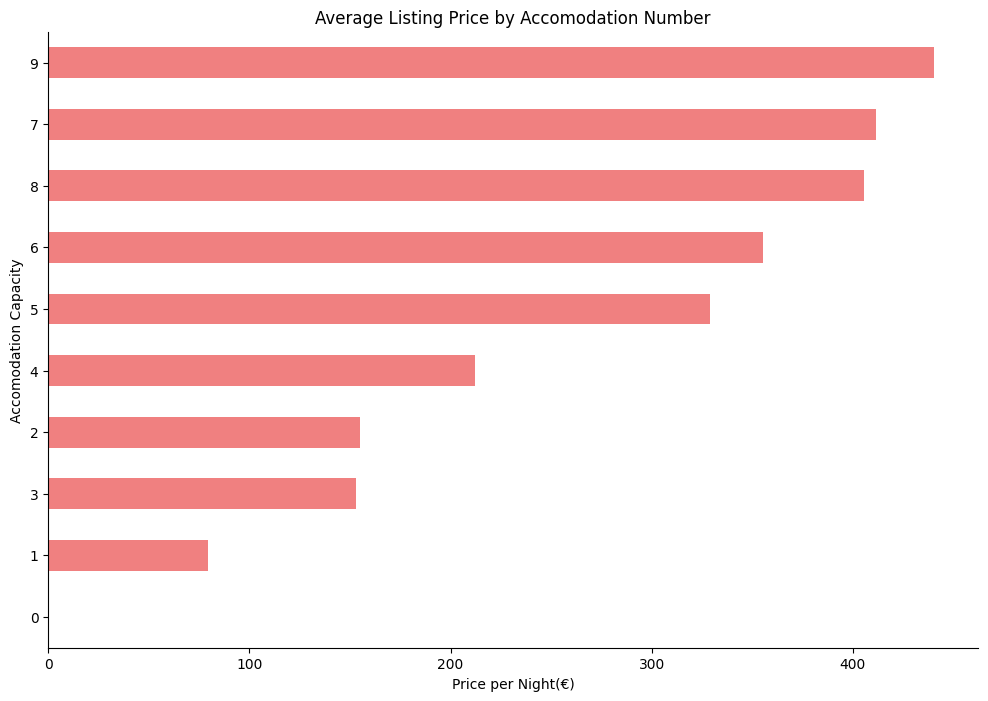

In [86]:
#Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ 
# most expensive neighborhood, and make sure to add a title and change axis labels as needed
(paris_listings_accomodations
 .plot
 .barh(
     title='Average Listing Price by Accomodation Number',
     figsize=(12, 8),
     color='lightcoral',
        xlabel='Price per Night(€)',
        ylabel='Accomodation Capacity',
        grid=False,
        legend=False      

 ))
sns.despine()

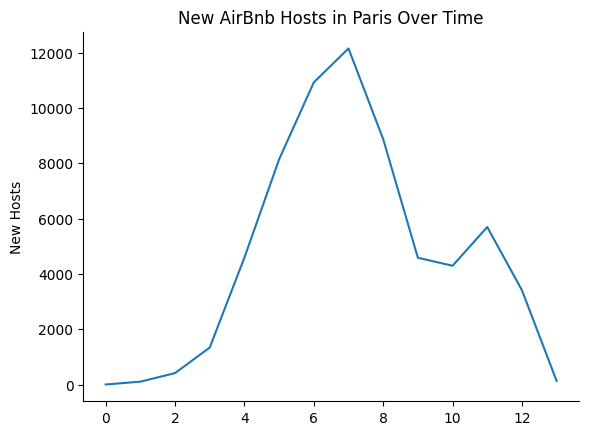

In [87]:
# Create a line chart of the number of new hosts over time in Paris
paris_listings_over_time['new_hosts'].plot(
    ylabel='New Hosts',
    title='New AirBnb Hosts in Paris Over Time'
)
sns.despine()

# Save the figure as a PNG file
plt.savefig('paris_new_hosts_over_time.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts and Higher Prices in Paris')

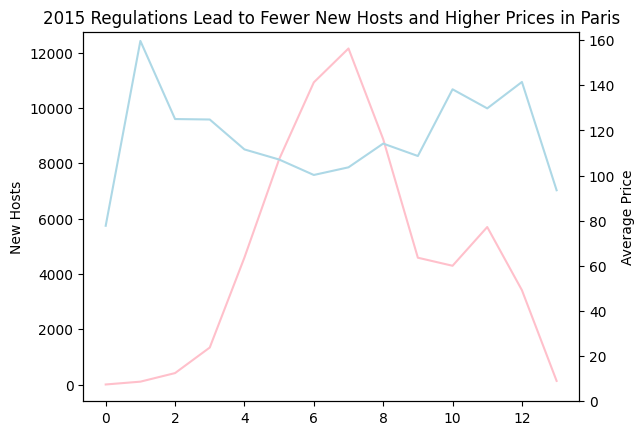

In [ ]:
#Create a dual axis line chart to show both new hosts and average price over time
fig, ax = plt.subplots()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['new_hosts'],
    label='New Hosts',
    color='pink'
)
ax.set_ylabel('New Hosts')
ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label='Average Price',
    color='lightblue'
)
ax2.set_ylim(0)

ax2.set_ylabel('Average Price')

ax.set_title('2015 Regulations Lead to Fewer New Hosts and Higher Prices in Paris')